# Linear Regression - `Introduction`

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# StatModels
import statsmodels.api as sm

# Scikit-Learn
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Warnings
import warnings

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

#### Random Data Generation

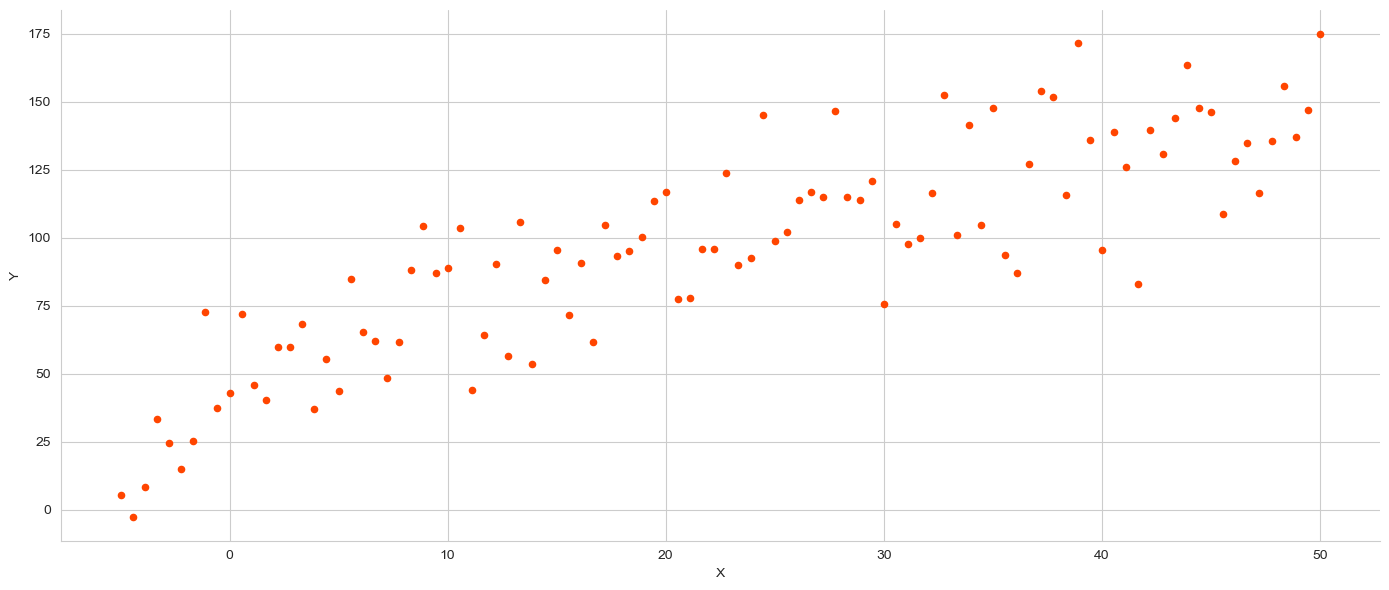

In [6]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))

data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6), color='orangered')
sns.despine()
plt.tight_layout()
plt.show()

#### Estimating a Simple Regression with `statsmodels`

In [7]:
X = sm.add_constant(data['X'])

model = sm.OLS(data['Y'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     264.3
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.40e-29
Time:                        16:05:19   Log-Likelihood:                -444.20
No. Observations:                 100   AIC:                             892.4
Df Residuals:                      98   BIC:                             897.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2223      3.577     13.480      0.0

#### Verifying Calculation

In [8]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

pd.Series(beta, index=X.columns)

const   48.22
X        2.11
dtype: float64

#### Displaying Model & Residuals

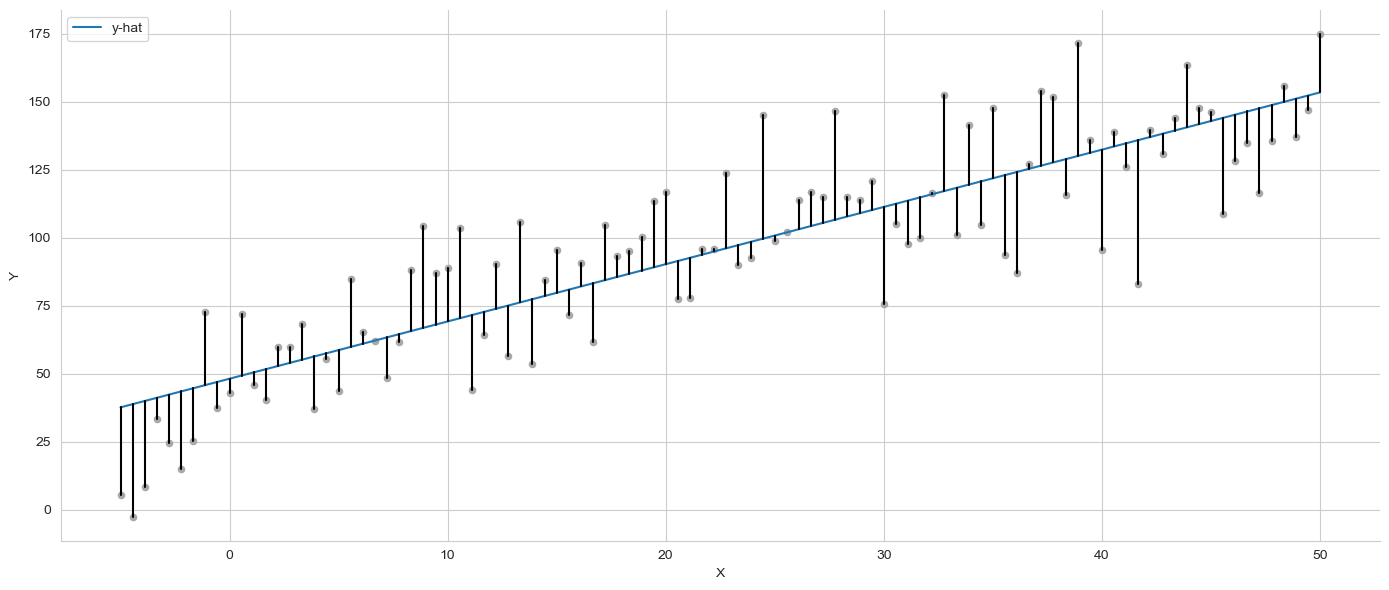

In [11]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid

ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);

for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    

sns.despine()
plt.tight_layout();
plt.show()

### Multiple Regression

#### Generating New Random Data

In [14]:
# # Data Set-Up
# size = 25
# X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')

# data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
# data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

# ## Plotting Out
# three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
# three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
# sns.despine()
# plt.tight_layout();

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

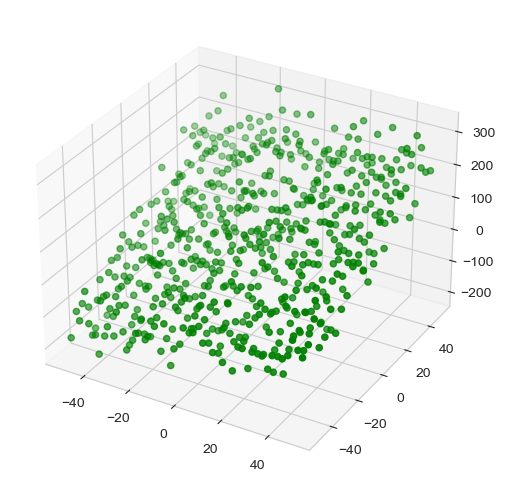

In [15]:
# Data Set-Up
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')

data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

# Plotting in 3D
fig = plt.figure(figsize=(15, 5))
three_dee = fig.add_subplot(111, projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
plt.tight_layout()
plt.show()

In [16]:
X = data[['X_1', 'X_2']]

y = data['Y']

#### Estimating Multiple Regression Model with `statsmodels`

In [17]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1120.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          7.27e-207
Time:                        16:15:13   Log-Likelihood:                -3331.8
No. Observations:                 625   AIC:                             6670.
Df Residuals:                     622   BIC:                             6683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1744      2.005     25.030      0.0

#### Verify Computation

In [19]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))

pd.Series(beta, index=X_ols.columns)

const   50.17
X_1      0.98
X_2      3.00
dtype: float64

#### Saving Output as Image

In [20]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

#### Displaying Model & Residuals

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

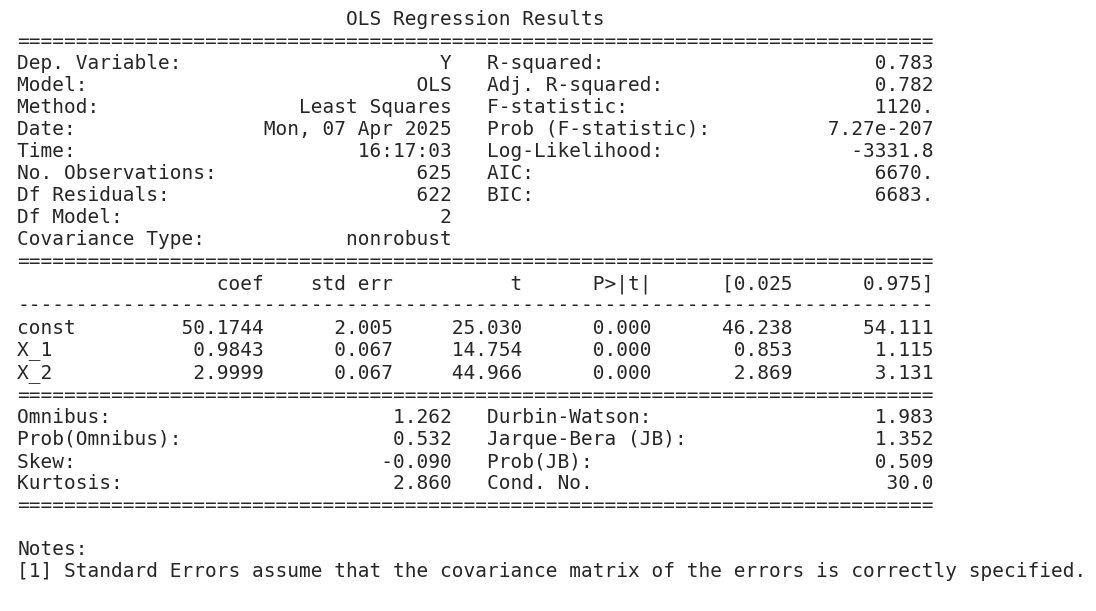

<Figure size 1500x500 with 0 Axes>

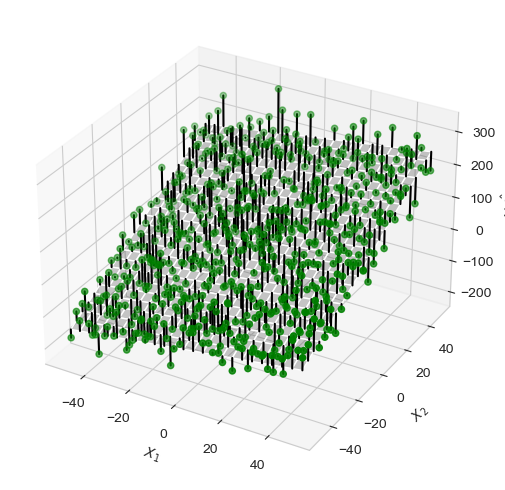

In [23]:
# Model Adjustment
model = LinearRegression()
model.fit(data[['X_1', 'X_2']], data['Y'])

# Prediction
data['y-hat'] = model.predict(data[['X_1', 'X_2']])
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']

# Plotting 3D Out
fig = plt.figure(figsize=(15, 5))
three_dee = fig.add_subplot(111, projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g', label='True Y')
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)

# Vertical error
for _, row in data.iterrows():
    three_dee.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-')

# Etiquetas
three_dee.set_xlabel('$X_1$')
three_dee.set_ylabel('$X_2$')
three_dee.set_zlabel('$Y, \hat{Y}$')

plt.tight_layout()
plt.show()

### Stochastic Gradient Descent Regression

#### Data Preparation

In [24]:
# Placing Scaler
scaler = StandardScaler()

# Fitting Scaler
X_ = scaler.fit_transform(X)

#### SGDRegressor Configuration

In [29]:
sgd = SGDRegressor(loss='squared_error', 
                   fit_intercept=True, 
                   shuffle=True, 
                   random_state=42,
                   learning_rate='invscaling', 
                   eta0=0.01, 
                   power_t=0.25)

#### Fitting Model

In [30]:
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

In [31]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_

pd.Series(coeffs, index=X.columns)

X_1     887.80
X_2   2,714.73
dtype: float64

In [35]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(X)})

In [36]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   50.00
ols   49.99
dtype: float64

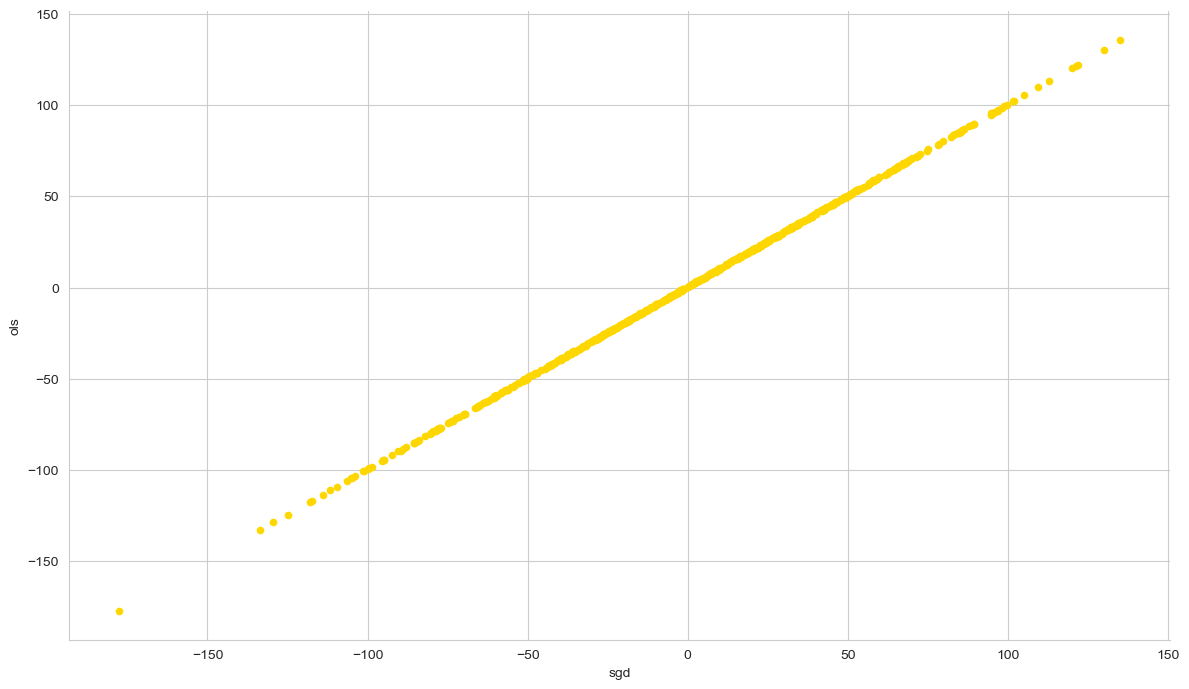

In [39]:
resids.plot.scatter(x='sgd', y='ols', color='gold')
sns.despine()
plt.tight_layout();
plt.show()